In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [5]:
# Load dataset
df = pd.read_csv("/content/Zomato Dataset.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-07-2021,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,26-07-2021,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,27-07-2021,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,28-07-2021,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,29-07-2021,134.949997,144.000000,132.199997,141.550003,141.550003,117973089
...,...,...,...,...,...,...,...
693,15-05-2024,188.800003,193.399994,183.149994,192.000000,192.000000,44772997
694,16-05-2024,192.899994,195.850006,189.000000,195.199997,195.199997,35478593
695,17-05-2024,195.149994,196.000000,193.100006,194.850006,194.850006,20841351
696,21-05-2024,194.399994,196.500000,188.750000,189.100006,189.100006,33453174


In [6]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort by date
df = df.sort_values('Date')

<ipython-input-6-76d408b9ff3c>:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
# Use only 'Close' price for prediction
data = df['Close'].values
data = data.reshape(-1, 1)

In [8]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create training and testing sets
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# Create sequences
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
        labels.append(data[i+seq_length])
    return np.array(sequences), np.array(labels)

<ipython-input-6-c1346c762214>:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])


In [9]:
seq_length = 60
x_train, y_train = create_sequences(train_data, seq_length)
x_test, y_test = create_sequences(test_data, seq_length)

# Reshape for LSTM input
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [10]:
# Build LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Set early stopping to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 0.0380 - val_loss: 0.0808
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0052 - val_loss: 0.0028
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step - loss: 0.0019 - val_loss: 0.0024
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0023 - val_loss: 0.0042
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - loss: 0.0015 - val_loss: 0.0031
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0016 - val_loss: 0.0038
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0012 - val_loss: 0.0027
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0014 - val_loss: 0.0029
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0012 - val_loss: 0.0037
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0015 - val_loss: 0.0045
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - loss: 0.0

In [11]:
# Make predictions
train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [12]:
# Invert scaling to get actual values
train_predictions = scaler.inverse_transform(train_predictions)
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predictions = scaler.inverse_transform(test_predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

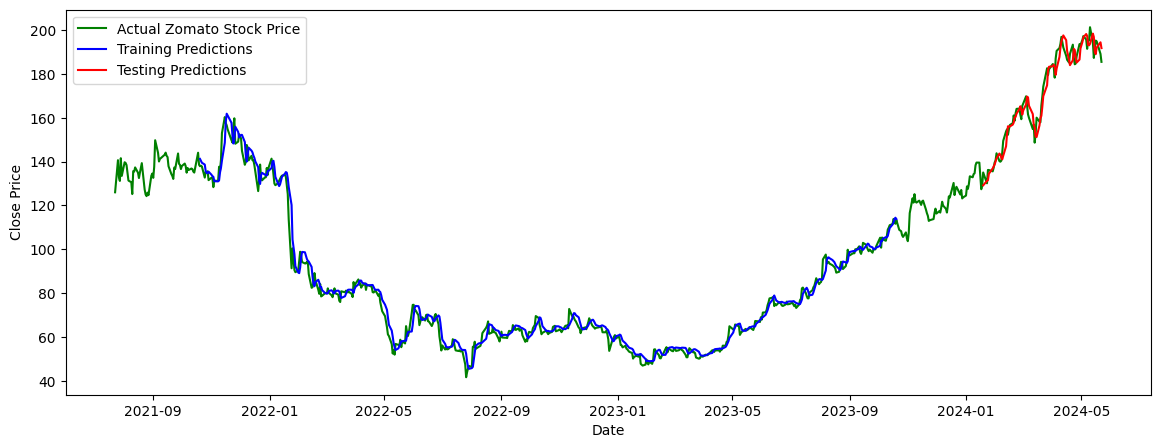

In [13]:
# Plot the results
plt.figure(figsize=(14, 5))
plt.plot(df['Date'], data, color='green', label='Actual Zomato Stock Price')
train_dates = df['Date'][:train_size].values[seq_length:]
test_dates = df['Date'][train_size:].values[seq_length:]
plt.plot(train_dates, train_predictions, color='blue', label='Training Predictions')
plt.plot(test_dates, test_predictions, color='red', label='Testing Predictions')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [14]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error

train_rmse = np.sqrt(mean_squared_error(y_train_actual, train_predictions))
test_rmse = np.sqrt(mean_squared_error(y_test_actual, test_predictions))


In [15]:
print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')

Training RMSE: 3.566995389792854
Testing RMSE: 4.387902290543969
